In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
import re
import string
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
folder_path = "reddit dataset/"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

In [3]:
data = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
data.to_csv("combined_data.csv", index=False)
#data = pd.read_csv("reddit dataset/college.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37580 entries, 0 to 37579
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     34712 non-null  object 
 1   ID             34712 non-null  object 
 2   is_Original    26311 non-null  object 
 3   Flair          19587 non-null  object 
 4   num_comments   29179 non-null  float64
 5   Title          29179 non-null  object 
 6   Subreddit      37580 non-null  object 
 7   Body           16405 non-null  object 
 8   URL            29179 non-null  object 
 9   Upvotes        37580 non-null  int64  
 10  Comments       27163 non-null  object 
 11  creation_date  37580 non-null  object 
 12  is_original    2868 non-null   object 
 13  Text           8400 non-null   object 
 14  Sentiment      8401 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 4.3+ MB


In [5]:
data.isnull().sum()

Unnamed: 0        2868
ID                2868
is_Original      11269
Flair            17993
num_comments      8401
Title             8401
Subreddit            0
Body             21175
URL               8401
Upvotes              0
Comments         10417
creation_date        0
is_original      34712
Text             29180
Sentiment        29179
dtype: int64

In [6]:
data = data.drop(columns=['Unnamed: 0', 'is_Original', 'Flair', 'URL'])
data

,ID,num_comments,Title,Subreddit,Body,Upvotes,Comments,creation_date,is_original,Text,Sentiment
0,fcpbui,13.0,Can't have sex the same,AdviceForTeens,"I'm in a relationship of 2 years, naturally be...",24,Have you tried trying your hardest to just con...,2020-03-03 12:39:21,NaN,NaN,NaN
1,fbtk1w,3.0,How to break up with a friend in the most peac...,AdviceForTeens,I’d love for us to slide off of each other but...,18,there’s really two ways you can do this.\r\nth...,2020-03-01 20:44:48,NaN,NaN,NaN
2,1681jg,4.0,[MODPOST] [META] Lets bring this subreddit bac...,AdviceForTeens,Hey everyone! I'm one of your friendly neighbo...,21,Me: http://i.imgur.com/QqKyW.jpg\r\n\r\nI also...,2013-01-09 10:23:30,NaN,NaN,NaN
3,fcmxds,0.0,The most important thing when texting a girl i...,AdviceForTeens,Here are some tips on how to text a girl and s...,18,NaN,2020-03-03 09:33:01,NaN,NaN,NaN
4,f9gz1a,15.0,"My dad found my porn, help",AdviceForTeens,So.. I got a virus onto my laptop so my dad de...,18,"How old are you? If you’re of reasonable age, ...",2020-02-26 04:51:52,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
37575,2l6gjh,0.0,This thread is one of the most goddamn infuria...,YouthRights,NaN,0,NaN,2014-11-03 18:30:32,NaN,NaN,NaN
37576,1unipq,0.0,Youth baseball is better when you train with d...,YouthRights,NaN,0,NaN,2014-01-07 21:08:33,NaN,NaN,NaN
37577,klm9m,12.0,Under 35 Entrepreneur? Win a Re:LIFE Inc Prize,YouthRights,NaN,0,IMO this has nothing to do \nwith youth rights...,2011-09-20 14:42:42,NaN,NaN,NaN
37578,16yt7q,11.0,How many years until we'll be ready for a 12-y...,YouthRights,I still like to let it sink in from time to ti...,0,> the average 5th grader has access to the sam...,2013-01-21 03:09:56,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37580 entries, 0 to 37579
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             34712 non-null  object 
 1   num_comments   29179 non-null  float64
 2   Title          29179 non-null  object 
 3   Subreddit      37580 non-null  object 
 4   Body           16405 non-null  object 
 5   Upvotes        37580 non-null  int64  
 6   Comments       27163 non-null  object 
 7   creation_date  37580 non-null  object 
 8   is_original    2868 non-null   object 
 9   Text           8400 non-null   object 
 10  Sentiment      8401 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.2+ MB


In [8]:
data.isnull().sum()

ID                2868
num_comments      8401
Title             8401
Subreddit            0
Body             21175
Upvotes              0
Comments         10417
creation_date        0
is_original      34712
Text             29180
Sentiment        29179
dtype: int64

In [9]:
data.describe(include='all')

,ID,num_comments,Title,Subreddit,Body,Upvotes,Comments,creation_date,is_original,Text,Sentiment
count,34712,29179.000000,29179,37580,16405,37580.000000,27163,37580,2868,8400,8401
unique,28336,NaN,28187,30,16158,NaN,22784,29174,2,8399,3
top,fcpbui,NaN,Top 10 Machine Learning Methods Explained in L...,jobs,.,NaN,[removed],2020-03-03 01:26:23,False,new subreddit private institution watchdogs r ...,positive
freq,2,NaN,6,4990,7,NaN,2175,3,2867,2,5227
mean,NaN,163.882004,NaN,NaN,NaN,3021.694093,NaN,NaN,NaN,NaN,NaN
std,NaN,492.927243,NaN,NaN,NaN,11563.837167,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,7.000000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,42.000000,NaN,NaN,NaN,130.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,116.000000,NaN,NaN,NaN,718.000000,NaN,NaN,NaN,NaN,NaN


In [10]:
data["Title"].fillna("Null", inplace = True)
data["Body"].fillna("Null", inplace = True)
data["Comments"].fillna("Null", inplace = True)

In [11]:
data.isnull().sum()

ID                2868
num_comments      8401
Title                0
Subreddit            0
Body                 0
Upvotes              0
Comments             0
creation_date        0
is_original      34712
Text             29180
Sentiment        29179
dtype: int64

In [12]:
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')

In [13]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    text = [wn.lemmatize(word) for word in text if word not in stopwords]
    return text

<>:3: SyntaxWarning: invalid escape sequence '\W'
<>:3: SyntaxWarning: invalid escape sequence '\W'
C:\Users\aryan\AppData\Local\Temp\ipykernel_19580\2602690433.py:3: SyntaxWarning: invalid escape sequence '\W'
  tokens = re.split('\W+', text)


In [17]:
data['cleaned_Title'] = data['Title'].apply(lambda x: clean_text(x))
data['cleaned_Body'] = data['Body'].apply(lambda x: clean_text(x))
data['Cleaned_Comments'] = data['Comments'].apply(lambda x: clean_text(x))

In [14]:
data.head()

,ID,num_comments,Title,Subreddit,Body,Upvotes,Comments,creation_date,is_original,Text,Sentiment
0,fcpbui,13.0,Can't have sex the same,AdviceForTeens,"I'm in a relationship of 2 years, naturally be...",24,Have you tried trying your hardest to just con...,2020-03-03 12:39:21,NaN,NaN,NaN
1,fbtk1w,3.0,How to break up with a friend in the most peac...,AdviceForTeens,I’d love for us to slide off of each other but...,18,there’s really two ways you can do this.\r\nth...,2020-03-01 20:44:48,NaN,NaN,NaN
2,1681jg,4.0,[MODPOST] [META] Lets bring this subreddit bac...,AdviceForTeens,Hey everyone! I'm one of your friendly neighbo...,21,Me: http://i.imgur.com/QqKyW.jpg\r\n\r\nI also...,2013-01-09 10:23:30,NaN,NaN,NaN
3,fcmxds,0.0,The most important thing when texting a girl i...,AdviceForTeens,Here are some tips on how to text a girl and s...,18,Null,2020-03-03 09:33:01,NaN,NaN,NaN
4,f9gz1a,15.0,"My dad found my porn, help",AdviceForTeens,So.. I got a virus onto my laptop so my dad de...,18,"How old are you? If you’re of reasonable age, ...",2020-02-26 04:51:52,NaN,NaN,NaN


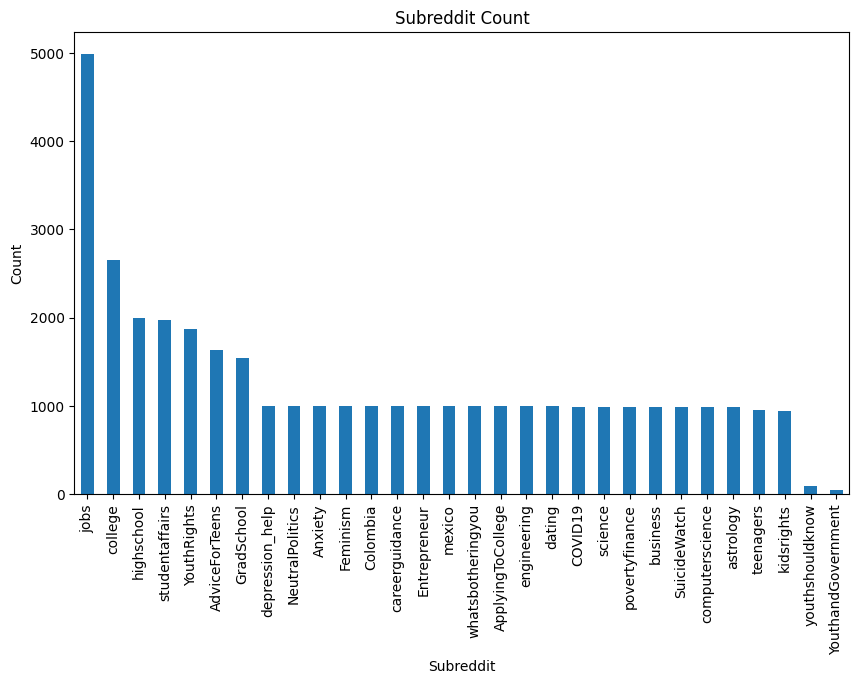

In [15]:
plt.figure(figsize=(10, 6))
data['Subreddit'].value_counts().plot(kind='bar')
plt.title('Subreddit Count')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.show()

In [16]:
num_comments = data.groupby('Subreddit')['num_comments'].sum()
num_comments

Subreddit
AdviceForTeens           2593.0
Anxiety                113242.0
ApplyingToCollege      104089.0
COVID19                161204.0
Colombia                20591.0
Entrepreneur           196313.0
Feminism                79561.0
GradSchool               7584.0
NeutralPolitics        220603.0
SuicideWatch            59763.0
YouthRights              2347.0
YouthandGovernment         60.0
astrology               59835.0
business               145545.0
careerguidance          63286.0
college                217937.0
computerscience          8257.0
dating                 134556.0
depression_help         17303.0
engineering             87019.0
highschool              10730.0
jobs                    32740.0
kidsrights                247.0
mexico                 110180.0
povertyfinance         194114.0
science               1917108.0
studentaffairs           3540.0
teenagers              804007.0
whatsbotheringyou        7503.0
youthshouldknow            56.0
Name: num_comments, dtype: flo

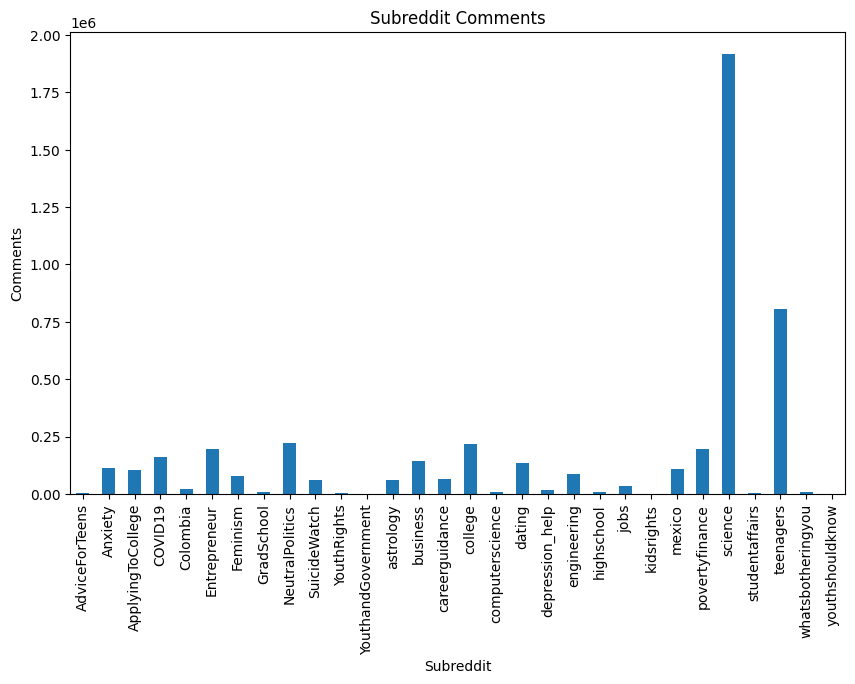

In [17]:
plt.figure(figsize=(10, 6))
num_comments.plot(kind='bar')
plt.title('Subreddit Comments')
plt.xlabel('Subreddit')
plt.ylabel('Comments')
plt.show()

In [18]:
original_data = data.groupby('Subreddit')['Upvotes'].sum()
original_data

Subreddit
AdviceForTeens            4630
Anxiety                1086186
ApplyingToCollege      1729804
COVID19                 568621
Colombia                135881
Entrepreneur            760330
Feminism               1200134
GradSchool               38720
NeutralPolitics         566904
SuicideWatch            467616
YouthRights              16112
YouthandGovernment         138
astrology               280443
business                864529
careerguidance          154098
college                2109352
computerscience          37687
dating                  482650
depression_help         100644
engineering             727678
highschool              121666
jobs                    111286
kidsrights                2790
mexico                 1280497
povertyfinance         3653765
science               48419100
studentaffairs            8262
teenagers             48609451
whatsbotheringyou        16004
youthshouldknow            286
Name: Upvotes, dtype: int64

<Axes: >

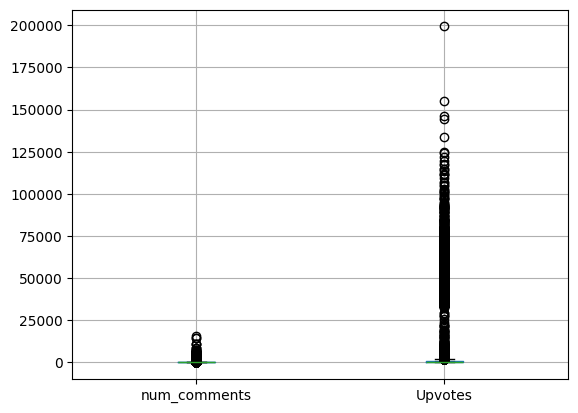

In [19]:
data.boxplot()

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05 :
        Sentiment = 'Positive'
    elif scores['compound'] <= -0.05 :
        Sentiment = 'Negative'
    else :
        Sentiment = 'Neutral'
    return Sentiment

In [21]:
data['Title_Sentiment'] = data['Title'].apply(sentiment_analyzer_scores)
data[['Title', 'Title_Sentiment']].head()

,Title,Title_Sentiment
0,Can't have sex the same,Neutral
1,How to break up with a friend in the most peac...,Positive
2,[MODPOST] [META] Lets bring this subreddit bac...,Negative
3,The most important thing when texting a girl i...,Negative
4,"My dad found my porn, help",Positive


In [22]:
data['Title_Sentiment'].value_counts()

Title_Sentiment
Neutral     20253
Positive     8756
Negative     8571
Name: count, dtype: int64

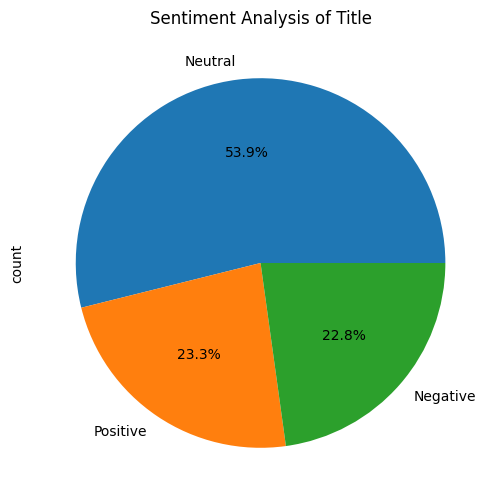

In [23]:
plt.figure(figsize=(10, 6))
data['Title_Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Analysis of Title')
plt.show()

In [24]:
import spacy
from spacy import displacy

NER = spacy.load("en_core_web_lg")

In [25]:
text1 = data['Title'].apply(lambda x: NER(x))

In [32]:
for i in text1:
    displacy.render(i, style='ent', jupyter=True)

In [ ]:
from bertopic import BERTopic
topic_model = BERTopic()

   ---------------------------------------- 0.0/726.2 kB ? eta -:--:--
   --------------------------------------- 726.2/726.2 kB 29.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------  14.7/14.8 MB 83.8 MB/s eta 0:00:01
   ---------------------------------------- 14.8/14.8 MB 71.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 54.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   ------------------------ --------------- 18.4/30.3 MB 89.1 MB/s eta 0:00:01
   ---------------------------------------- 30.3/30.3 MB 66.4 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\aryan\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\hdbscan\\_hdbscan_boruvka.cp312-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,Topic,Count,Name,Representation,Representative_Docs
0,-1,12312,-1_you_to_the_job,"[you, to, the, job, and, for, of, this, it, is]",[Has anyone had an experience being a bit sad ...
1,0,8406,0_null_probing_quadratic_hashtables,"[null, probing, quadratic, hashtables, regardi...","[Null, Null, Null]"
2,1,1853,1_de_en_la_el,"[de, en, la, el, colombia, que, del, los, un, ...",[Colombia cuenta con el mayor número de aves e...
3,2,755,2_computer_science_cs_programming,"[computer, science, cs, programming, learning,...","[What do I need to learn computer science, I w..."
4,3,560,3_business_selling_ama_entrepreneur,"[business, selling, ama, entrepreneur, revenue...",[We are two 24 year olds who invested $4000 to...
...,...,...,...,...,...
353,352,10,352_gamers_gaming_games_video,"[gamers, gaming, games, video, babies, fiction...",[Social media and television use — but not vid...
354,353,10,353_hours_productivity_40_microsoft,"[hours, productivity, 40, microsoft, paints, a...","[Does a 40 hours a week work get any better?, ..."
355,354,10,354_notice_give_mehow_twoweeks,"[notice, give, mehow, twoweeks, weeks, two, no...","[Two weeks notice for a day off, How much noti..."
356,355,10,355_corona_travellers_amidst_us17,"[corona, travellers, amidst, us17, shutdowns, ...",[Sweet Tomatoes confirms it’s permanently clos...


In [ ]:
topics, probabilities = topic_model.fit_transform(data['Title'])
data['Title_Topic'] = topics

topic_model.get_topic_info()